# [LAB 06] 4. 데이터 분포 시각화 (3)

### 패키지 참조

In [1]:
from hossam import load_data
from matplotlib import font_manager as fm
from matplotlib import pyplot as plt
from pandas import pivot_table
import seaborn as sb

In [2]:
my_dpi = 200
fpath = "./NotoSansKR-Regular.ttf"
fm.fontManager.addfont(fpath)
fprop = fm.FontProperties(fname=fpath) # 폰트의 속성을 읽어옴
fname = fprop.get_name() # 읽어온 속성에서 폰트의 이름만 추출
plt.rcParams['font.family'] = fname
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

In [3]:
origin = load_data("flights")
origin

[data] https://data.hossam.kr/data/lab06/flights.xlsx
[desc] 어느 항공사의 년/월별 국제선 탑승객 수(출처: seaborn 내장 데이터)

field       description
----------  ----------------------------------
year        항공 승객 수가 집계된 연도
month       항공 승객 수가 집계된 월
passengers  해당 년도/월의 국제선 항공 승객 수



,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [4]:
df = origin.copy()
df['month'] = df['month'].map({"January": 1, "February": 2, "March": 3, "April": 4,
"May": 5, "June": 6, "July": 7, "August": 8,
"September": 9, "October": 10, "November": 11, "December": 12})
df

,year,month,passengers
0,1949,1,112
1,1949,2,118
2,1949,3,132
3,1949,4,129
4,1949,5,121
...,...,...,...
139,1960,8,606
140,1960,9,508
141,1960,10,461
142,1960,11,390


In [5]:
df2=pivot_table(df,index='year',columns='month',values='passengers')
df2

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1949,112.0,118.0,132.0,129.0,121.0,135.0,148.0,148.0,136.0,119.0,104.0,118.0
1950,115.0,126.0,141.0,135.0,125.0,149.0,170.0,170.0,158.0,133.0,114.0,140.0
1951,145.0,150.0,178.0,163.0,172.0,178.0,199.0,199.0,184.0,162.0,146.0,166.0
1952,171.0,180.0,193.0,181.0,183.0,218.0,230.0,242.0,209.0,191.0,172.0,194.0
1953,196.0,196.0,236.0,235.0,229.0,243.0,264.0,272.0,237.0,211.0,180.0,201.0
1954,204.0,188.0,235.0,227.0,234.0,264.0,302.0,293.0,259.0,229.0,203.0,229.0
1955,242.0,233.0,267.0,269.0,270.0,315.0,364.0,347.0,312.0,274.0,237.0,278.0
1956,284.0,277.0,317.0,313.0,318.0,374.0,413.0,405.0,355.0,306.0,271.0,306.0
1957,315.0,301.0,356.0,348.0,355.0,422.0,465.0,467.0,404.0,347.0,305.0,336.0


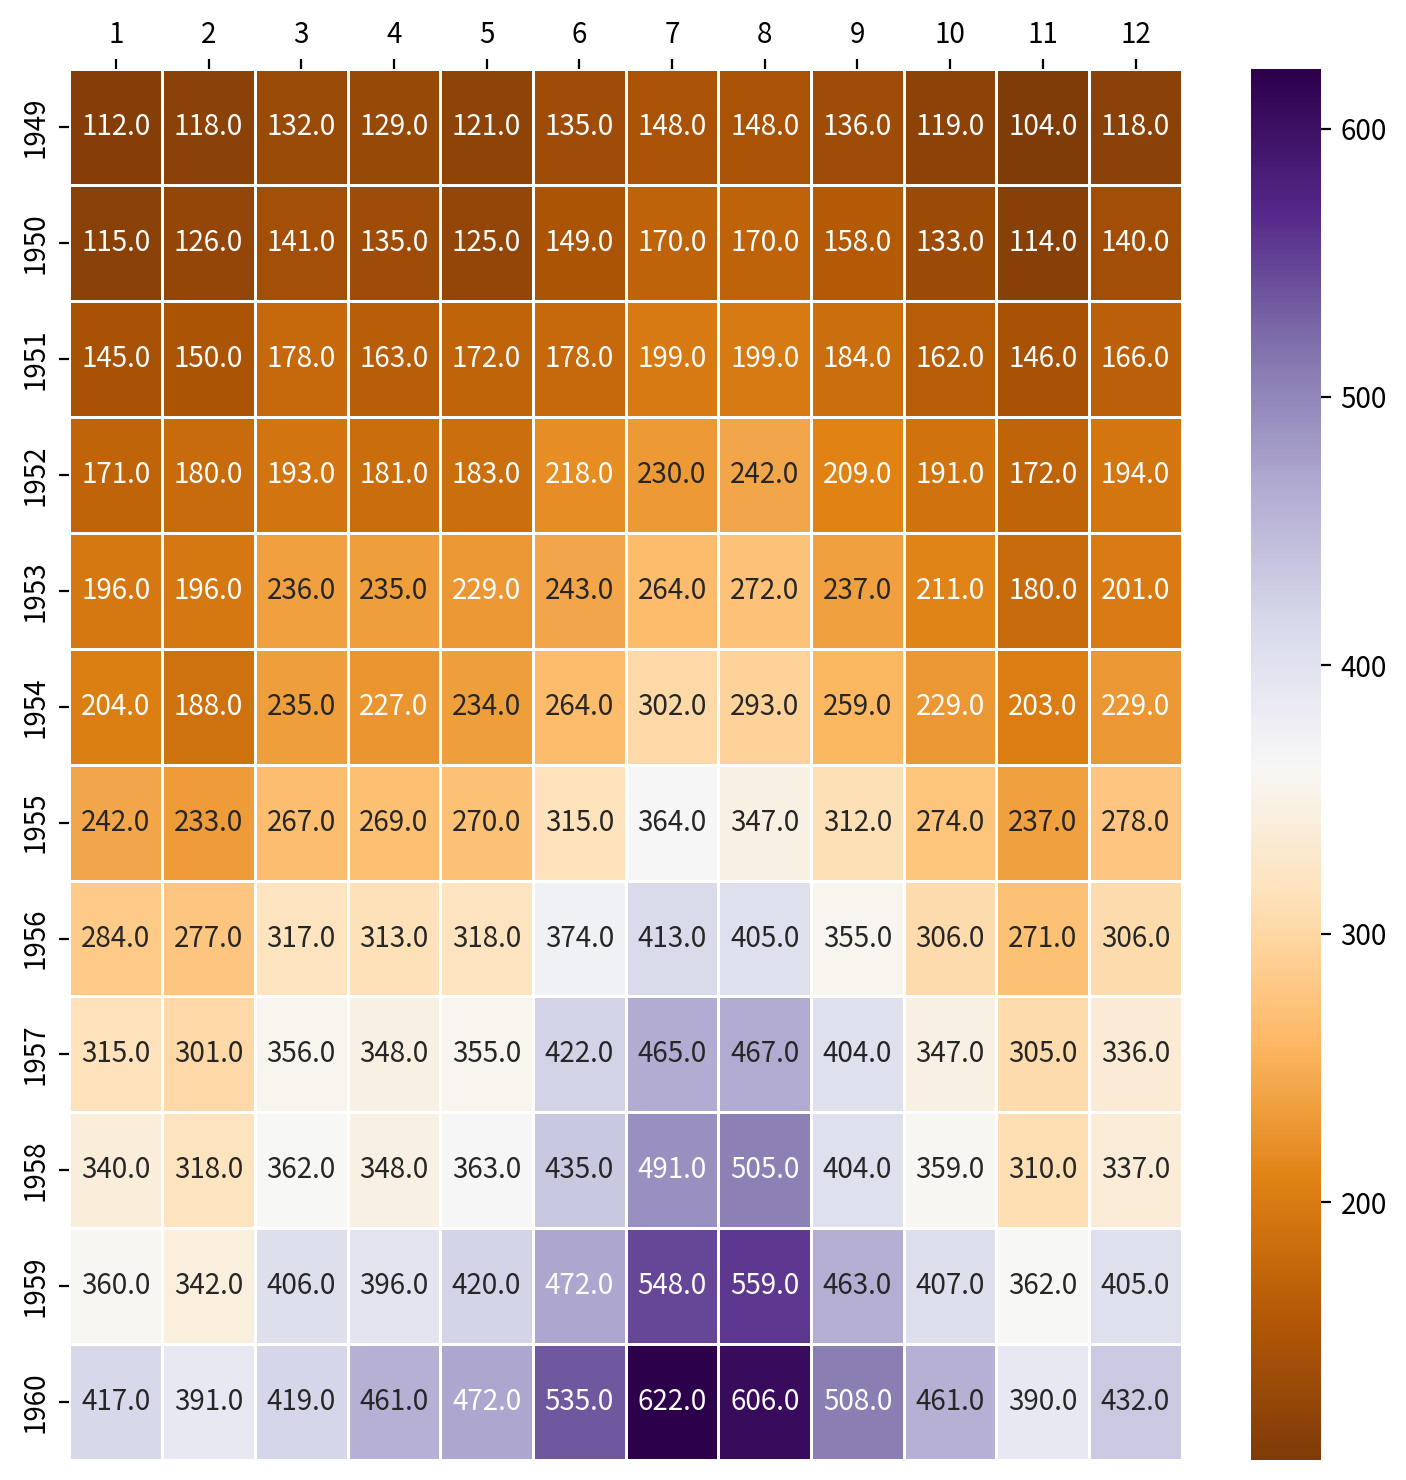

In [8]:
# 1) 그래프 초기화 (캔바스(fig)와 도화지(ax) 준비하기)
width_px = 1500
height_px = 1500
rows = 1
cols = 1
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

#2) 그래프 그리기 -> seaborn 사용
sb.heatmap(data=df2, annot=True, fmt="0.1f", linewidth=0.5,cmap="PuOr")

ax.set_xlabel("")
ax.set_ylabel("")
ax.xaxis.tick_top() 

# 4) 출력

plt.tight_layout()
#plt.savefig("myplot.png", dpi=my_dpi)
plt.show() # 그래프 화면 출력
plt.close()